In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import sklearn
import os

%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

### Problem 1

In [2]:
from sklearn.datasets import fetch_openml
cifar_10_small = fetch_openml('CIFAR_10_Small', version=1)

In [3]:
cifar_10_small.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [4]:
X, y = cifar_10_small['data'], cifar_10_small['target']

In [5]:
print('shape X: {}, one example shape: {}'.format(X.shape, X[0].shape))

shape X: (20000, 3072), one example shape: (3072,)


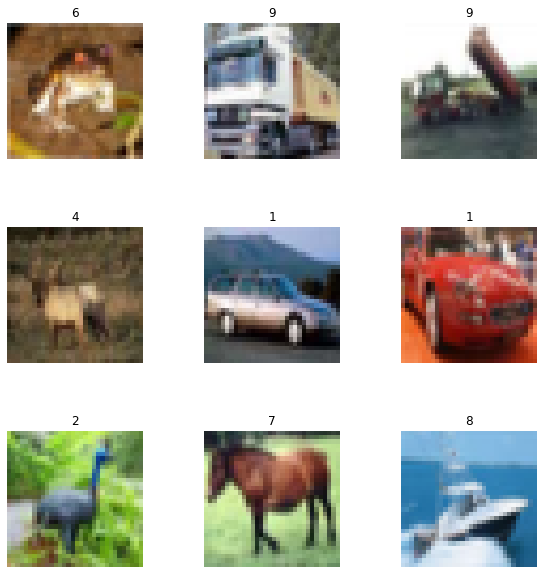

In [6]:
f, axes = plt.subplots(3, 3, figsize=(10,10))
axs = axes.ravel()

for i in range(9):
    example = X[i]
    R = example[0:1024].reshape(32,32)/255.0
    G = example[1024:2048].reshape(32,32)/255.0
    B = example[2048:].reshape(32,32)/255.0

    img = np.dstack((R,G,B))
    axs[i].imshow(img, interpolation='nearest')
    axs[i].set_title(y[i])
    axs[i].axis('off')

# show the figure
plt.subplots_adjust(hspace = 0.5)
plt.show()

In [7]:
def display(X, index):
    example = X[i]
    R = example[0:1024].reshape(32,32)/255.0
    G = example[1024:2048].reshape(32,32)/255.0
    B = example[2048:].reshape(32,32)/255.0

    img = np.dstack((R,G,B))
    plt.imshow(img, interpolation='nearest')
    plt.title(y[i])
    plt.axis('off')
    plt.show()

In [8]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [9]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

log_reg = LogisticRegression(multi_class='multinomial', solver='saga')

param_grid = {'penalty': ['l1', 'l2'], 'C': [0.25, 0.5, 0.75, 1] }

log_reg_grid = GridSearchCV(log_reg, param_grid, cv=5, verbose=2)
log_reg_grid.fit(X_train, y_train)

Fitting 5 folds for each of 8 candidates, totalling 40 fits
[CV] C=0.25, penalty=l1 ..............................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
/Users/cgokalp/anaconda/envs/ds_lab/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  3.9min remaining:    0.0s


[CV] ............................... C=0.25, penalty=l1, total= 3.9min
[CV] C=0.25, penalty=l1 ..............................................


/Users/cgokalp/anaconda/envs/ds_lab/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV] ............................... C=0.25, penalty=l1, total= 3.7min
[CV] C=0.25, penalty=l1 ..............................................


/Users/cgokalp/anaconda/envs/ds_lab/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV] ............................... C=0.25, penalty=l1, total= 3.9min
[CV] C=0.25, penalty=l1 ..............................................


/Users/cgokalp/anaconda/envs/ds_lab/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV] ............................... C=0.25, penalty=l1, total= 3.8min
[CV] C=0.25, penalty=l1 ..............................................


/Users/cgokalp/anaconda/envs/ds_lab/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV] ............................... C=0.25, penalty=l1, total= 3.9min
[CV] C=0.25, penalty=l2 ..............................................


/Users/cgokalp/anaconda/envs/ds_lab/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV] ............................... C=0.25, penalty=l2, total= 2.3min
[CV] C=0.25, penalty=l2 ..............................................


/Users/cgokalp/anaconda/envs/ds_lab/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV] ............................... C=0.25, penalty=l2, total= 2.3min
[CV] C=0.25, penalty=l2 ..............................................


/Users/cgokalp/anaconda/envs/ds_lab/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV] ............................... C=0.25, penalty=l2, total= 2.4min
[CV] C=0.25, penalty=l2 ..............................................


/Users/cgokalp/anaconda/envs/ds_lab/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV] ............................... C=0.25, penalty=l2, total= 2.3min
[CV] C=0.25, penalty=l2 ..............................................


/Users/cgokalp/anaconda/envs/ds_lab/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV] ............................... C=0.25, penalty=l2, total= 2.4min
[CV] C=0.5, penalty=l1 ...............................................


/Users/cgokalp/anaconda/envs/ds_lab/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV] ................................ C=0.5, penalty=l1, total= 3.8min
[CV] C=0.5, penalty=l1 ...............................................


/Users/cgokalp/anaconda/envs/ds_lab/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV] ................................ C=0.5, penalty=l1, total= 3.8min
[CV] C=0.5, penalty=l1 ...............................................


/Users/cgokalp/anaconda/envs/ds_lab/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV] ................................ C=0.5, penalty=l1, total= 3.8min
[CV] C=0.5, penalty=l1 ...............................................


/Users/cgokalp/anaconda/envs/ds_lab/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV] ................................ C=0.5, penalty=l1, total= 3.6min
[CV] C=0.5, penalty=l1 ...............................................


/Users/cgokalp/anaconda/envs/ds_lab/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV] ................................ C=0.5, penalty=l1, total= 3.7min
[CV] C=0.5, penalty=l2 ...............................................


/Users/cgokalp/anaconda/envs/ds_lab/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV] ................................ C=0.5, penalty=l2, total= 2.2min
[CV] C=0.5, penalty=l2 ...............................................


/Users/cgokalp/anaconda/envs/ds_lab/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV] ................................ C=0.5, penalty=l2, total= 2.2min
[CV] C=0.5, penalty=l2 ...............................................


/Users/cgokalp/anaconda/envs/ds_lab/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV] ................................ C=0.5, penalty=l2, total= 2.1min
[CV] C=0.5, penalty=l2 ...............................................


/Users/cgokalp/anaconda/envs/ds_lab/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV] ................................ C=0.5, penalty=l2, total= 2.2min
[CV] C=0.5, penalty=l2 ...............................................


/Users/cgokalp/anaconda/envs/ds_lab/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV] ................................ C=0.5, penalty=l2, total= 2.1min
[CV] C=0.75, penalty=l1 ..............................................


/Users/cgokalp/anaconda/envs/ds_lab/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV] ............................... C=0.75, penalty=l1, total= 3.5min
[CV] C=0.75, penalty=l1 ..............................................


/Users/cgokalp/anaconda/envs/ds_lab/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV] ............................... C=0.75, penalty=l1, total= 3.5min
[CV] C=0.75, penalty=l1 ..............................................


/Users/cgokalp/anaconda/envs/ds_lab/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV] ............................... C=0.75, penalty=l1, total= 3.5min
[CV] C=0.75, penalty=l1 ..............................................


/Users/cgokalp/anaconda/envs/ds_lab/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV] ............................... C=0.75, penalty=l1, total= 3.5min
[CV] C=0.75, penalty=l1 ..............................................


/Users/cgokalp/anaconda/envs/ds_lab/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV] ............................... C=0.75, penalty=l1, total= 3.5min
[CV] C=0.75, penalty=l2 ..............................................


/Users/cgokalp/anaconda/envs/ds_lab/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV] ............................... C=0.75, penalty=l2, total= 2.1min
[CV] C=0.75, penalty=l2 ..............................................


/Users/cgokalp/anaconda/envs/ds_lab/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV] ............................... C=0.75, penalty=l2, total= 2.2min
[CV] C=0.75, penalty=l2 ..............................................


/Users/cgokalp/anaconda/envs/ds_lab/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV] ............................... C=0.75, penalty=l2, total= 2.1min
[CV] C=0.75, penalty=l2 ..............................................


/Users/cgokalp/anaconda/envs/ds_lab/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV] ............................... C=0.75, penalty=l2, total= 2.2min
[CV] C=0.75, penalty=l2 ..............................................


/Users/cgokalp/anaconda/envs/ds_lab/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV] ............................... C=0.75, penalty=l2, total= 2.1min
[CV] C=1, penalty=l1 .................................................


/Users/cgokalp/anaconda/envs/ds_lab/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV] .................................. C=1, penalty=l1, total= 3.5min
[CV] C=1, penalty=l1 .................................................


/Users/cgokalp/anaconda/envs/ds_lab/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV] .................................. C=1, penalty=l1, total= 3.5min
[CV] C=1, penalty=l1 .................................................


/Users/cgokalp/anaconda/envs/ds_lab/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV] .................................. C=1, penalty=l1, total= 3.5min
[CV] C=1, penalty=l1 .................................................


/Users/cgokalp/anaconda/envs/ds_lab/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV] .................................. C=1, penalty=l1, total= 3.5min
[CV] C=1, penalty=l1 .................................................


/Users/cgokalp/anaconda/envs/ds_lab/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV] .................................. C=1, penalty=l1, total= 3.5min
[CV] C=1, penalty=l2 .................................................


/Users/cgokalp/anaconda/envs/ds_lab/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV] .................................. C=1, penalty=l2, total= 2.1min
[CV] C=1, penalty=l2 .................................................


/Users/cgokalp/anaconda/envs/ds_lab/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV] .................................. C=1, penalty=l2, total= 2.2min
[CV] C=1, penalty=l2 .................................................


/Users/cgokalp/anaconda/envs/ds_lab/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV] .................................. C=1, penalty=l2, total= 2.1min
[CV] C=1, penalty=l2 .................................................


/Users/cgokalp/anaconda/envs/ds_lab/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV] .................................. C=1, penalty=l2, total= 2.2min
[CV] C=1, penalty=l2 .................................................


/Users/cgokalp/anaconda/envs/ds_lab/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
[Parallel(n_jobs=1)]: Done  40 out of  40 | elapsed: 116.8min finished


[CV] .................................. C=1, penalty=l2, total= 2.1min


/Users/cgokalp/anaconda/envs/ds_lab/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


GridSearchCV(cv=5,
             estimator=LogisticRegression(multi_class='multinomial',
                                          solver='saga'),
             param_grid={'C': [0.25, 0.5, 0.75, 1], 'penalty': ['l1', 'l2']},
             verbose=2)

In [10]:
log_reg_grid.best_params_

{'C': 0.25, 'penalty': 'l1'}

In [11]:
def display_scores(model, X, y, cv=5):
    scores = cross_val_score(model, X, y, n_jobs=-1, scoring='accuracy', cv=cv)
    print(str(model.__class__.__name__) + '; mean: {:.4f} w std ({:.4f})'.format(scores.mean(), scores.std()))
    return scores 

In [12]:
from sklearn.model_selection import cross_val_score

cross_val_score(log_reg_grid.best_estimator_, X_train, y_train, n_jobs=-1, cv=5)

array([0.37933333, 0.35733333, 0.36566667, 0.37533333, 0.363     ])

In [13]:
from sklearn.metrics import log_loss

#train_error
train_preds = log_reg_grid.best_estimator_.predict_proba(X_train)
loss = log_loss(y_train, train_preds)
print('train error: ', loss)

#test_error
test_preds = log_reg_grid.best_estimator_.predict_proba(X_test)
loss = log_loss(y_test, test_preds)
print('test error: ', loss)

train error:  1.443853690689008
test error:  1.8119034920143935


### Problem 2

In [14]:
mnist = fetch_openml('mnist_784', version=1)
mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [15]:
X, y = mnist['data'], mnist['target']

In [16]:
def plot_digit(data):
    image = data.reshape(28, 28)
    plt.imshow(image, cmap = mpl.cm.binary,
               interpolation="nearest")
    plt.axis("off")

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1/7, random_state=42)

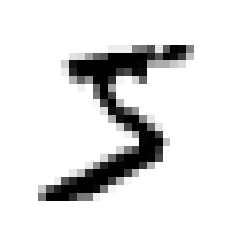

In [18]:
plot_digit(X[0])

In [38]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

log_reg = LogisticRegression(multi_class='multinomial', solver='saga')

param_grid = {'penalty': ['l1', 'l2'], 'C': [0.25, 0.5, 0.75]}

lr_gridsearch = GridSearchCV(log_reg, param_grid, cv=5, n_jobs=-1, verbose=2)
lr_gridsearch.fit(X_train, y_train)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


KeyboardInterrupt: 

In [ ]:
lr_gridsearch.best_params_

In [ ]:
for mean_score, params in zip(lr_gridsearch.cv_results_["mean_test_score"], lr_gridsearch.cv_results_["params"]):
    print(mean_score, params)

In [ ]:
# cross_val_score(lr_gridsearch.best_estimator_, X_train, y_train, n_jobs=-1, cv=5)

In [ ]:
display_scores(lr_gridsearch.best_estimator_, X_train, y_train)

In [ ]:
from sklearn.metrics import log_loss

#train_error
train_preds = lr_gridsearch.best_estimator_.predict_proba(X_train)
loss = log_loss(y_train, train_preds)
print('train error: ', loss)

#test_error
test_preds = lr_gridsearch.best_estimator_.predict_proba(X_test)
loss = log_loss(y_test, test_preds)
print('test error: ', loss)

In [ ]:
lr_gridsearch.best_estimator_.coef_.shape

In [ ]:
coefs = lr_gridsearch.best_estimator_.coef_

In [ ]:
f, axs = plt.subplots(5, 2, figsize=(10,10))
axs = axs.ravel()

for j in range(coefs.shape[0]):
    cur_coef = coefs[j, :]
    reshaped = cur_coef.reshape(28,28)
    axs[j].imshow(reshaped, cmap=mpl.cm.binary, interpolation='nearest')
    axs[j].axis('off')
plt.show()
    

### Problem 3

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier(max_features='sqrt', random_state=42)

param_grid = {
        'n_estimators': [100, 500],
        'max_depth': [6, 8],
#         'bootstrap': [False, True],
        'min_samples_leaf': [10, 50],
        'min_samples_split' : [100, 500] 
    }


rf_gridsearch = GridSearchCV(rf_clf, param_grid=param_grid, cv=5,
                       scoring='accuracy', n_jobs=-1, verbose=2)

rf_gridsearch.fit(X_train, y_train)

In [ ]:
print('best params: ', rf_gridsearch.best_params_)

In [ ]:
display_scores(rf_gridsearch.best_estimator_, X_train, y_train)

In [ ]:
from sklearn.metrics import accuracy_score

y_pred = rf_gridsearch.predict(X_test)
y_pred_log = lr_gridsearch.predict(X_test)
print('random forest classifier accuracy: {}, log reg classifier accuracy: {}'.format(accuracy_score(y_test, y_pred), accuracy_score(y_test, y_pred_log)))

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

gb_clf = GradientBoostingClassifier(max_features='sqrt', random_state=42)

param_grid = {
        'subsample' : [0.5, 0.8],
        'n_estimators': [100, 500],
        'max_depth': [4, 8],
        'min_samples_leaf': [50, 100],
        'min_samples_split' : [500, 1000] 
}

gb_gridsearch = GridSearchCV(gb_clf, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=2)

gb_gridsearch.fit(X_train, y_train)

In [ ]:
print('best params: ', gb_gridsearch.best_params_)

In [ ]:
y_pred_gb = gb_gridsearch.predict(X_test)
print('gradient boosting classifier accuracy: {}'.format(accuracy_score(y_test, y_pred_gb)

### Problem 4

In [ ]:
X_cifar, y_cifar = cifar_10_small['data'], cifar_10_small['target']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_cifar, y_cifar, test_size=0.25, random_state=42)

Random Forest

In [ ]:
rf_clf = RandomForestClassifier(max_features='sqrt', random_state=42)

param_grid = {
        'n_estimators': [100, 500, 1000],
        'max_depth': [4, 8, 16],
        'bootstrap': [False, True],
        'min_samples_leaf': [100, 200],
        'min_samples_split' : [1000, 2000] 
    }


rf_gridsearch = GridSearchCV(rf_clf, param_grid=param_grid, cv=5,
                       scoring='accuracy', n_jobs=-1, verbose=2)

rf_gridsearch.fit(X_train, y_train)

In [ ]:
print('best params: ', rf_gridsearch.best_params_)

In [ ]:
y_pred = rf_gridsearch.predict(X_test)
print('random forest classifier accuracy: {}'.format(accuracy_score(y_test, y_pred)

Gradient Boosting

In [ ]:

gb_clf = GradientBoostingClassifier(max_features='sqrt', random_state=42)

param_grid = {
        'subsample' : [0.5, 0.8],
        'n_estimators': [100, 500],
        'max_depth': [3, 6, 8],
        'min_samples_leaf': [100, 200],
        'min_samples_split' : [1000, 2000] 
}

gb_gridsearch = GridSearchCV(gb_clf, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=2)

gb_gridsearch.fit(X_train, y_train)

In [ ]:
print('best params: ', gb_gridsearch.best_params_)

In [ ]:
y_pred = gb_gridsearch.predict(X_test)
print('gradient boosting classifier accuracy: {}'.format(accuracy_score(y_test, y_pred)

### Problem 5

### Problem 6